<a href="https://colab.research.google.com/github/mahtab71/Smallplaces/blob/main/Copy_of_Fall_detection_yolo_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import torch
from IPython.display import Image


In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/Fall detection/dataset/image/dataset1/yoloformat.zip'

with ZipFile(file_name, 'r') as zaa:
    zaa.extractall()
    print('Done')

Done


In [ ]:
!pip install tensorflow

!pip install tensorboard

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 16008 (delta 22), reused 22 (delta 13), pack-reused 15967
Receiving objects: 100% (16008/16008), 14.60 MiB | 36.02 MiB/s, done.
Resolving deltas: 100% (10988/10988), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
import os
from random import choice
import shutil

In [ ]:
imgs =[]
xmls =[]

train_path = '/content/yolov5/data/images/train'
val_path = '/content/yolov5/data/images/val'
source_path = '/content/yoloformat'

if not os.path.exists(train_path):
  os.mkdir(train_path)
if not os.path.exists(val_path):
  os.mkdir(val_path)

train_ratio = 0.8
val_ratio = 0.2

#total count of imgs
totalImgCount = len(os.listdir(source_path))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(source_path):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  299
Validation images are :  74


In [ ]:
trainimagePath = '/content/yolov5/data/images/train'
trainlabelPath =  '/content/yolov5/data/labels/train'
valimagePath = '/content/yolov5/data/images/val'
vallabelPath = '/content/yolov5/data/labels/val'

if not os.path.exists(trainimagePath):
  os.mkdir(trainimagePath)
if not os.path.exists(trainlabelPath):
  os.mkdir(trainlabelPath)
if not os.path.exists(valimagePath):
  os.mkdir(valimagePath)
if not os.path.exists(vallabelPath):
  os.mkdir(vallabelPath)

for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(trainlabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)


#cycle for test dir
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir

    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(vallabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(source_path, val_path)

In [ ]:
shutil.copy('/content/drive/MyDrive/Fall detection/dataset/image/dataset1/dataset.yaml', '/content/yolov5/data/dataset.yaml')

'/content/yolov5/data/dataset.yaml'

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5l.pt --cache

train: weights=yolov5l.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

In [ ]:
!python detect.py --source /content/fall024.jpg --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/fall024.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/fall024.jpg: 480x640 1 Fallen, 39.5ms
Speed: 0.5ms pre-process, 39.5ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


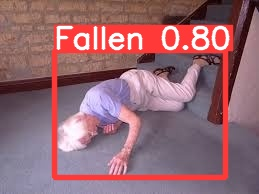

In [ ]:
Image('/content/yolov5/runs/detect/exp/fall024.jpg')

In [ ]:
!python detect.py --source /content/notfallen004.jpg --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/notfallen004.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/notfallen004.jpg: 448x640 1 seated, 38.2ms
Speed: 0.4ms pre-process, 38.2ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


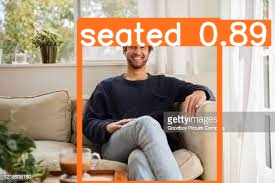

In [ ]:
Image('/content/yolov5/runs/detect/exp2/notfallen004.jpg')

In [ ]:
!python detect.py --source /content/notfallen030.png --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/notfallen030.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/notfallen030.png: 480x640 1 Notfallen, 40.3ms
Speed: 0.5ms pre-process, 40.3ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


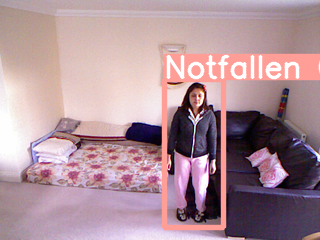

In [ ]:
Image('/content/yolov5/runs/detect/exp3/notfallen030.png')

In [ ]:
!python detect.py --source /content/video34.avi --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/video34.avi, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
video 1/1 (1/240) /content/video34.avi: 384x640 1 Notfallen, 1 seated, 40.2ms
video 1/1 (2/240) /content/video34.avi: 384x640 1 Notfallen, 1 seated, 8.1ms
video 1/1 (3/240) /content/video34.avi: 384x640 1 Notfallen, 1 seated, 8.1ms
video 1/1 (4/240) /content/video34.avi: 384x640 1 Notfallen, 1 seat

In [ ]:
!python detect.py --source /content/video34.avi --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/video34.avi, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
video 1/1 (1/240) /content/video34.avi: 384x640 1 Notfallen, 1 seated, 46.1ms
video 1/1 (2/240) /content/video34.avi: 384x640 1 Notfallen, 1 seated, 8.1ms
video 1/1 (3/240) /content/video34.avi: 384x640 1 Notfallen, 1 seated, 9.8ms
video 1/1 (4/240) /content/video34.avi: 384x640 1 Notfallen, 1 seat

In [ ]:
!python detect.py --source /content/video000.avi --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/video000.avi, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
video 1/1 (1/811) /content/video000.avi: 480x640 (no detections), 39.6ms
video 1/1 (2/811) /content/video000.avi: 480x640 (no detections), 9.7ms
video 1/1 (3/811) /content/video000.avi: 480x640 (no detections), 9.7ms
video 1/1 (4/811) /content/video000.avi: 480x640 (no detections), 9.7ms
video 1/1